In [7]:
# imports 
import os 
import sys
sys.path.append("../")

import numpy as np
# will need additional imports for sklearn/umap/etc

from datahandler import DataHandler

import pandas as pd
import umap
import umap.plot

# Used to get the data
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Some plotting libraries
import matplotlib.pyplot as plt
%matplotlib notebook
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE

In [8]:
# set random seed
# seed = np.random.randint(0, 2**32)
seed=123

# supply data directory
data_dir = os.path.join(os.pardir, "data", "preproc")
# load corpus
corpus = DataHandler(data_dir, seed)

# print some various information from the corpus
print("Total Word Count: {}".format(corpus.total_words))
print("Number of Docs in the Corpus: {}".format(corpus.total_docs))

# summarize statistics from all institutions in the corpus
print(corpus.stats)

Total Word Count: 2996921
Number of Docs in the Corpus: 283
[{'inst': 'MIT', 'n_docs': 18, 'wc': 135822}, {'inst': 'Know', 'n_docs': 32, 'wc': 293989}, {'inst': 'GSD', 'n_docs': 37, 'wc': 408691}, {'inst': 'AA', 'n_docs': 137, 'wc': 1532531}, {'inst': 'RISD', 'n_docs': 17, 'wc': 176116}, {'inst': 'CU', 'n_docs': 42, 'wc': 449772}]


## Raw Counts

(283, 46056)
(283, 2)


<IPython.core.display.Javascript object>


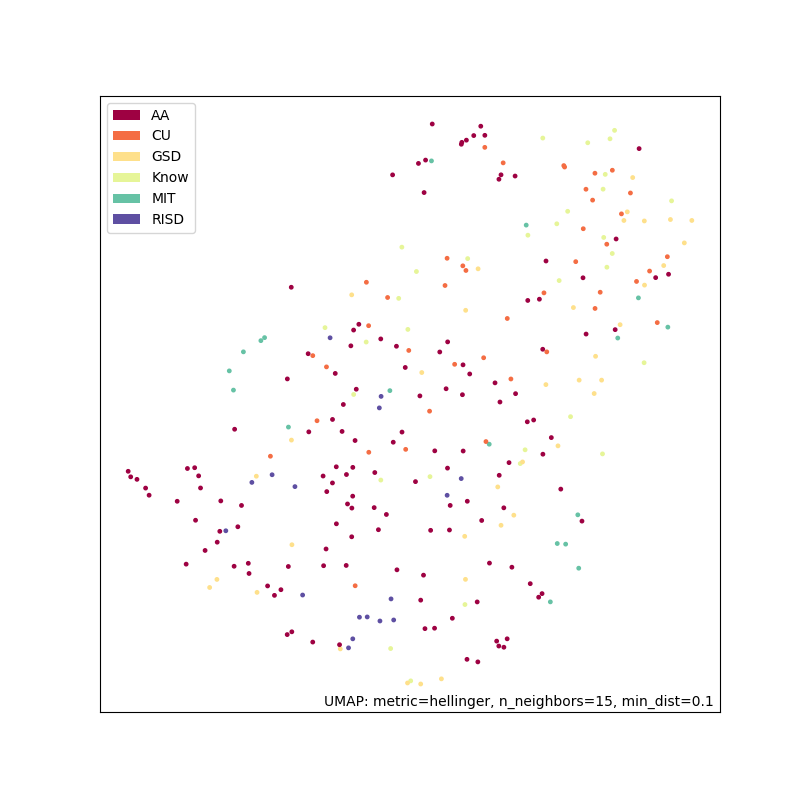

In [9]:

# vectorizer
vectorizer = CountVectorizer(min_df=0, input='filename')
word_doc_matrix = vectorizer.fit_transform(corpus.data.keys())
print(word_doc_matrix.shape)
# print(vectorizer.get_feature_names())
embedding = umap.UMAP(n_components=2, metric='hellinger').fit(word_doc_matrix)
print(embedding.embedding_.shape)
f = umap.plot.points(embedding, labels=np.array(list(corpus.data.values())))

we see strong clustering of schools. and there's no clear notion of topics/commonalities between schools. all stop words are included, df=0, default umap params

reasons:
introductions at start of lectures
we can try removing the start of lectures


(283, 13806)
(283, 2)


<IPython.core.display.Javascript object>


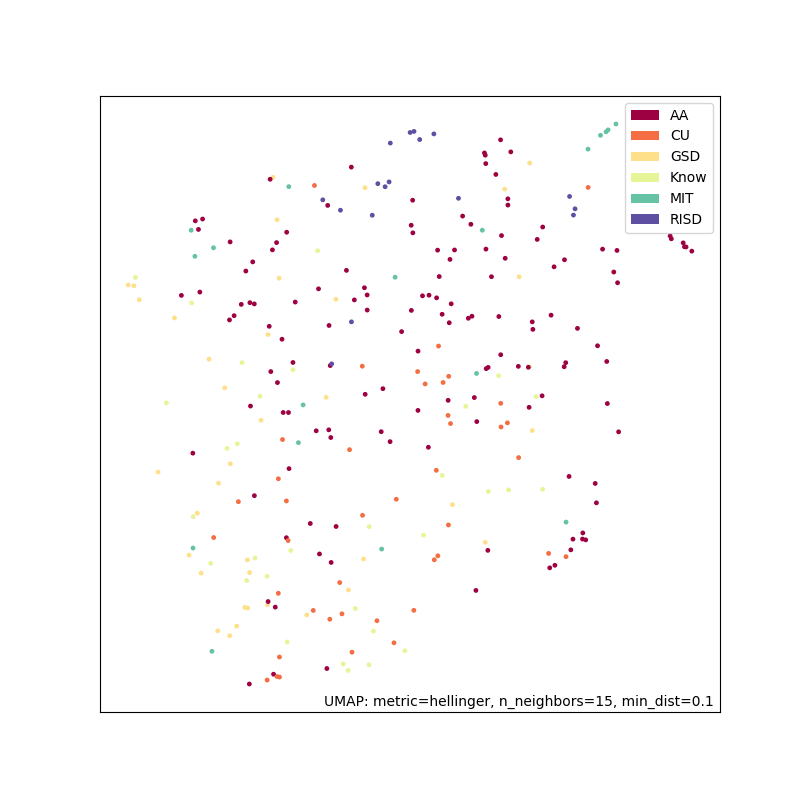

In [10]:
# vectorizer
vectorizer = CountVectorizer(min_df=5, stop_words="english", input='filename')
word_doc_matrix = vectorizer.fit_transform(corpus.data.keys())
print(word_doc_matrix.shape)
# print(vectorizer.get_feature_names())
embedding = umap.UMAP(n_components=2, metric='hellinger').fit(word_doc_matrix)
print(embedding.embedding_.shape)
f = umap.plot.points(embedding, labels=np.array(list(corpus.data.values())))

## TF-IDF 

In [5]:
hover_df = pd.DataFrame(corpus.data.keys(), columns=['inst'])


tfidf_vectorizer = TfidfVectorizer(min_df=5, stop_words='english', input='filename')
tfidf_word_doc_matrix = tfidf_vectorizer.fit_transform(corpus.data.keys())
tfidf_embedding = umap.UMAP(metric='hellinger').fit(tfidf_word_doc_matrix)
fig = umap.plot.interactive(tfidf_embedding, labels=np.array(list(corpus.data.values())),
                            hover_data = hover_df, point_size=10)
show(fig)

Thoughts: tf-idf gives puts lectures from AA into closer to other schools, it isn't clear why
using the speaker as a viz label
maybe the closely related documents are from the same speaker( speaker tours)


<IPython.core.display.Javascript object>


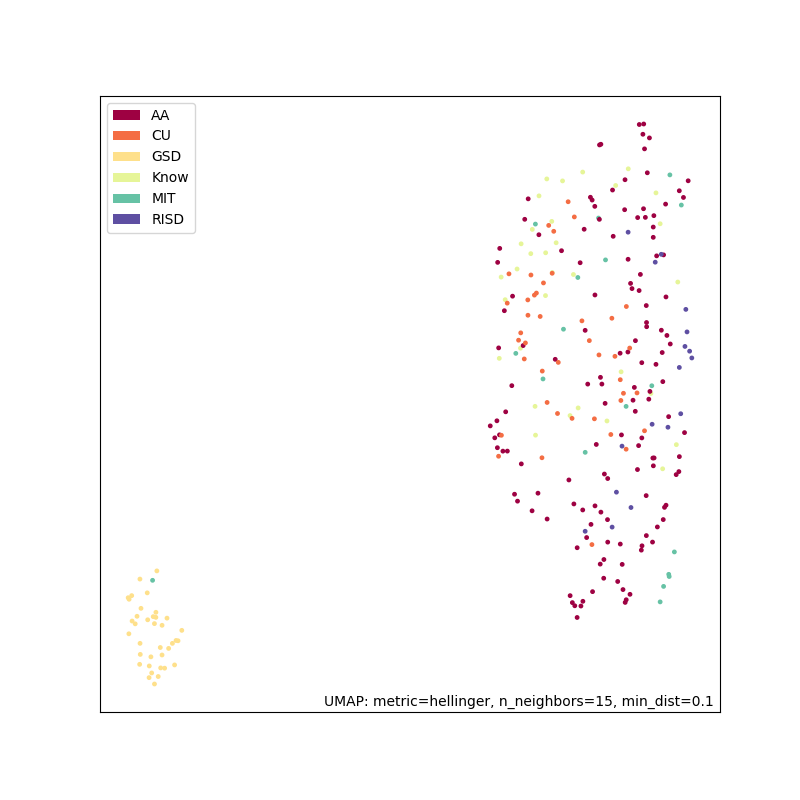

In [6]:
hover_df = pd.DataFrame(corpus.data.keys(), columns=['inst'])


tfidf_vectorizer = TfidfVectorizer(input='filename')
tfidf_word_doc_matrix = tfidf_vectorizer.fit_transform(corpus.data.keys())
tfidf_embedding = umap.UMAP(metric='hellinger').fit(tfidf_word_doc_matrix)
f = umap.plot.points(tfidf_embedding, labels=np.array(list(corpus.data.values())))
fig = umap.plot.interactive(tfidf_embedding, labels=np.array(list(corpus.data.values())),
                            hover_data = hover_df, point_size=10)
show(fig)

difference between professional vs academic lectures. still isn't clear why 
- AA tend to have round table